# 1 Regular Languages

----
## 1.1 Finite Automata

단수 automaton 복수 automata

유한오토마타(finite automata, FA)를 유한상태기계(finite state machine, FSM)이라고도 함


### Formal definition of a finite automaton

* Definition 1.5

  결정적 유한오토마타란 $(Q,\Sigma,\delta,q_0,F)$의 5-튜플이며, 이 때
    1. $Q$ 상태(state)의 유한집합
    1. $\Sigma$ 알파벳 - 심볼(symbol)의 유한집합
    1. $\delta : Q\times\Sigma \to Q$ 전이함수(transition funciton)
    1. $q_0 \in Q$ 시작 상태(start state)
    1. $F \subseteq Q$ 종료상태(final state)의 집합
  
  종료상태 혹은 끝나는 상태를 받아들여지는 상태(accept state)라고도 한다.

우선 결정적 유한오토마타(deterministic finite automata, DFA)부터 살펴보자.

In [1]:
newtype DFA q a = DFA ([q], [a], (q,a) -> q, q, [q])
{-
   q 상태의 타입
   a 심볼의 타입
   [q] 상태가 여러 개 나열된 타입 (집합 대신 그냥 리스트로 표현)
   [a] 심볼이 여러 개 나열된 타입 (집합 대신 그냥 리스트로 표현)
-}

instance (Show q, Show a) => Show (DFA q a) where
  show (DFA (qs,as,d,q0,fs)) = show (qs,as,dtbl,q0,fs)
      where dtbl = d2tblDFA qs as d

-- 전이함수를 순서쌍 데이타로
d2tblDFA qs as d = [((q,a), d(q,a)) | q<-qs, a<-as]

In [2]:
import Data.Maybe (fromJust, fromMaybe)
import Data.List (elemIndex, groupBy, intercalate)

import IHaskell.Display.Graphviz
-- dot "digraph { l -> o; o -> v; v -> e; h -> a ; a -> s; s -> k ; k -> e ; e -> l ; l -> l}"

dfa2graph :: (Eq q, Show q, Show a) => DFA q a -> String
dfa2graph (DFA (qs,as,d,q0,fs))
     = "digraph { node [shape=circle]; rankdir=LR; "
    ++ "thestart [shape=none label=\"\" width=0]; "
    ++ "thestart -> "++show(q2i q0)++"; "
    ++ concat [show i++" [label=\""++(filter (/='"') . show $ i2q i)++"\"]; " | i<-is]
    ++ concat [show(q2i q)++" [shape=doublecircle]; " | q<-fs]
    -- ++ concat [show i++" -> "++show(d'(i,a))++" [label=\""++show a++"\"]; " | i<-is, a<-as] -- 각각 라벨
    ++ concat [ show i++" -> "++show j++" [label=\""++showls ls++"\"]; " | ((i,j),ls) <-es] -- 같은 시작/끝 점 모아 라벨
    ++ "}"
    where
    is = [0 .. length qs-1]
    q2i q = fromJust $ elemIndex q qs
    i2q i = qs !! i
    d'(i,a) = q2i $ d(i2q i,a)
    es = map collectSnd $ groupByFst [((i,d'(i,a)), a) | i<-is, a<-as]
    showls = intercalate "," . map (filter (/='"') . show)

groupByFst = groupBy (\(x1,_) (x2,_) -> x1==x2)
collectSnd ps = (x, ls)
    where (x:_, ls) = unzip ps

drawDFA :: (Eq q, Show q, Show a) => DFA q a -> Graphviz
drawDFA = dot . dfa2graph

In [3]:
dfaM1 = DFA (["q1","q2","q3"],[0,1],d,"q1",["q2"])
    where
    d("q1",0) = "q1"; d("q1",1) = "q2"
    d("q2",0) = "q3"; d("q2",1) = "q2"
    d("q3",0) = "q2"; d("q3",1) = "q2"

In [4]:
dfaM1

(["q1","q2","q3"],[0,1],[(("q1",0),"q1"),(("q1",1),"q2"),(("q2",0),"q3"),(("q2",1),"q2"),(("q3",0),"q2"),(("q3",1),"q2")],"q1",["q2"])

"digraph { node [shape=circle]; rankdir=LR; thestart [shape=none label=\"\" width=0]; thestart -> 0; 0 [label=\"q1\"]; 1 [label=\"q2\"]; 2 [label=\"q3\"]; 1 [shape=doublecircle]; 0 -> 0 [label=\"0\"]; 0 -> 1 [label=\"1\"]; 1 -> 2 [label=\"0\"]; 1 -> 1 [label=\"1\"]; 2 -> 1 [label=\"0,1\"]; }"

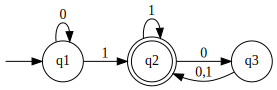

In [5]:
dfa2graph dfaM1
drawDFA dfaM1

### Examples of finite automata


In [6]:
-- dfaM2

In [7]:
-- dfaM3

In [8]:
-- dfaM4

In [9]:
-- dfaM5

### Formal defintion of computation

* Definition 1.6 인식하는 유한오토마타가 존재하는 언어가 정규언어

  a regular language if some finite automaton recognizes it

* $M$ recognizes language $A$

  if $A = \{w\mid M ~\text{accepts}~ w\}$

* $M=(Q,\Sigma,\delta,q_0,F)$ accepts $w = a_1a_2a_3\cdots a_n$ where $a_i\in\Sigma$

  if $\delta(\cdots\delta(\delta(\delta(q_0,a_1),a_2),a_3)\cdots,a_n) \in F$
  
  도식적으로 나타내면
  $q_0 \stackrel{a_1}{\longrightarrow} r_1
       \stackrel{a_2}{\longrightarrow} r_2
       \stackrel{a_3}{\longrightarrow} \cdots
       \stackrel{a_n}{\longrightarrow} r_n$ where $r_n \in F$

In [10]:
(DFA (_,_,d,q0,fs)) `accepts` w = foldl (curry d) q0 w `elem` fs

In [11]:
dfaM1 `accepts` []
dfaM1 `accepts` [0]
dfaM1 `accepts` [1]

False

False

True

In [12]:
dfaM1 `accepts` [0,0]
dfaM1 `accepts` [0,1]
dfaM1 `accepts` [1,0]
dfaM1 `accepts` [1,1]

False

True

False

True

In [13]:
dfaM1 `accepts` [1,0,0]
dfaM1 `accepts` [1,0,1]
dfaM1 `accepts` [1,1,0]
dfaM1 `accepts` [1,1,1]

True

True

False

True

### Designing finite automata

교재 정독

### The regular operations

* Definition 1.23 두 언어 A와 B에 대한 정규연산 세 가지

    * union $A\cup B$
    * concatentation $A\cdot B$
    * star $A^*$


* Theorem 1.25

  The class of regular languages is closed under the union operation

  즉, $A_1$와 $A_2$가 정규언어이면 $A_1\cup A_2$도 정규언어
  
  증명은 $A_1$을 인식하는 유한오토마타 $M_1$과 $A_2$를 인식하는 유한오토마타 $M_2$로부터
  $A_1\cup A_2$를 인식하는 유한오토마타를 만들어 낼 수 있음을 보이면 된다. (proof by construction)

In [14]:
unionDFA :: (Eq q1, Eq q2, Eq a) => DFA q1 a -> DFA q2 a -> DFA (q1,q2) a
unionDFA (DFA (qs1,as1,d1,q01,fs1)) (DFA (qs2,as2,d2,q02,fs2))
    | as1 == as2 = DFA (qs,as,d,q0,fs)
    | otherwise  = error "not the same alphabet"
    where
    qs = [(q1,q2) | q1<-qs1, q2<-qs2] -- cartesian product
    as = as1
    q0 = (q01,q02)
    fs = [(q1,q2) | (q1,q2) <- qs, q1 `elem` fs1 || q2 `elem` fs2]
    d((q1,q2),a) = (d1(q1,a), d2(q2,a))

(["p0","p1","p2"],[0,1],[(("p0",0),"p0"),(("p0",1),"p1"),(("p1",0),"p1"),(("p1",1),"p2"),(("p2",0),"p2"),(("p2",1),"p0")],"p0",["p1"])

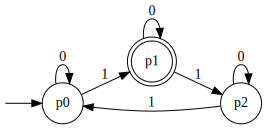

In [15]:
-- 1이 나타는 회수가 3으로 나눈 나머지 1인 경우를 받아들임
m1 = DFA (["p0","p1","p2"],[0,1], d1, "p0", ["p1"])
    where
    d1("p0",0) = "p0"; d1("p0",1) = "p1"
    d1("p1",0) = "p1"; d1("p1",1) = "p2"
    d1("p2",0) = "p2"; d1("p2",1) = "p0"
m1
drawDFA m1

(["p0","p1","p2"],[0,1],[(("p0",0),"p0"),(("p0",1),"p1"),(("p1",0),"p1"),(("p1",1),"p2"),(("p2",0),"p2"),(("p2",1),"p0")],"p0",["p1"])

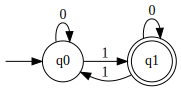

In [16]:
-- 1이 나타는 회수가 홀수인 경우를 받아들임
m2 = DFA (["q0","q1"],     [0,1], d2, "q0", ["q1"])
    where
    d2("q0",0) = "q0"; d2("q0",1) = "q1"
    d2("q1",0) = "q1"; d2("q1",1) = "q0"
m1
drawDFA m2

([("p0","q0"),("p0","q1"),("p1","q0"),("p1","q1"),("p2","q0"),("p2","q1")],[0,1],[((("p0","q0"),0),("p0","q0")),((("p0","q0"),1),("p1","q1")),((("p0","q1"),0),("p0","q1")),((("p0","q1"),1),("p1","q0")),((("p1","q0"),0),("p1","q0")),((("p1","q0"),1),("p2","q1")),((("p1","q1"),0),("p1","q1")),((("p1","q1"),1),("p2","q0")),((("p2","q0"),0),("p2","q0")),((("p2","q0"),1),("p0","q1")),((("p2","q1"),0),("p2","q1")),((("p2","q1"),1),("p0","q0"))],("p0","q0"),[("p0","q1"),("p1","q0"),("p1","q1"),("p2","q1")])

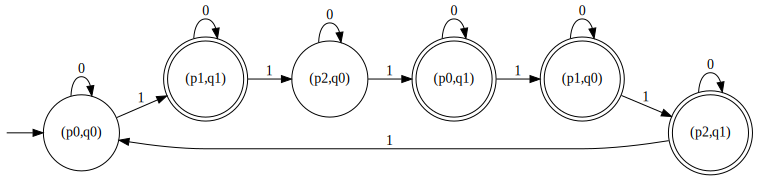

In [17]:
-- 1이 나타나는 회수가 6으로 나눈 나머지 1,3,4,5인 경우를 받아들임
m = unionDFA m1 m2

m

drawDFA m

----
## 1.2 Nondeterminism

정규언어가 union 말고 나머지 두 정규연산인 concatenation과 star에 대해서도 닫혀있다는 것을 보이는 데
비결정적 유한오토마타(nondeterministic finite automata, NFA)를 써먹을 수 있다.

### Formal defintion of a nondeterministic finite automata

* Definition 1.37

  비결정적 유한오토마타란 $(Q,\Sigma,\delta,q_0,F)$의 5-튜플이며, 이 때
    1. $Q$ 상태(state)의 유한집합
    1. $\Sigma$ 알파벳 - 심볼(symbol)의 유한집합
    1. $\delta : Q\times\Sigma_\varepsilon \to Q$ 전이함수(transition funciton). 여기서 $\Sigma_\varepsilon = \Sigma\cup\{\varepsilon\}$
    1. $q_0 \in Q$ 시작 상태(start state)
    1. $F \subseteq Q$ 종료상태(final state)의 집합

In [18]:
newtype NFA q a = NFA ([q], [a], (q,[a]) -> [q], q, [q])
{-
   q 상태의 타입
   a 심볼의 타입
   [q] 상태가 여러 개 나열된 타입 (집합 대신 그냥 리스트로 표현)
   [a] 심볼이 여러 개 나열된 타입 (집합 대신 그냥 리스트로 표현)
   
   전이함수의 타입은 사실 (q,Maybe a) -> [q] 가 좀더 정확하지만
   그냥 [a]를 Maybe a대신에 쓰되 원소가 없거나 1개가 들어있는 리스트만 고려한다
   이건 그냥 []가 Nothing보다 짧고 [x]가 Just x보다 타이핑하기 짧아서 ... 
-}

instance (Show q, Show a) => Show (NFA q a) where
  show (NFA (qs,as,d,q0,fs)) = show (qs,as,dtbl,q0,fs)
      where dtbl = d2tblNFA qs as d

-- 전이함수를 순서쌍 데이타로
d2tblNFA qs as d = [((q,x), d(q,x)) | q<-qs, x<-[[a] |a<-as]++[[]]]

In [19]:
import Data.Maybe (fromJust,fromMaybe)
import Data.List (elemIndex, groupBy, intercalate)

import IHaskell.Display.Graphviz
-- dot "digraph { l -> o; o -> v; v -> e; h -> a ; a -> s; s -> k ; k -> e ; e -> l ; l -> l}"

nfa2graph :: (Eq q, Show q, Show a) => NFA q a -> String
nfa2graph (NFA (qs,as,d,q0,fs))
     = "digraph { node [shape=circle]; rankdir=LR; "
    ++ "thestart [shape=none label=\"\" width=0]; "
    ++ "thestart -> "++show(q2i q0)++"; "
    ++ concat [show i++" [label=\""++(filter (/='"') . show $ i2q i)++"\"]; " | i<-is]
    ++ concat [show(q2i q)++" [shape=doublecircle]; " | q<-fs]
    -- ++ concat [show i++" -> "++show(d'(i,a))++" [label=\""++show a++"\"]; " | i<-is, a<-as] -- 각각 라벨
    ++ concat [ show i++" -> "++show j++" [label=\""++showls ls++"\"]; " | ((i,j),ls) <-es] -- 같은 시작/끝 점 모아 라벨
    ++ "}"
    where
    is = [0 .. length qs-1]
    q2i q = fromJust $ elemIndex q qs
    i2q i = qs !! i
    d'(i,x) = map q2i $ d(i2q i,x)
    es = map collectSnd $ groupByFst [((i,j), x) | i<-is, x<-[[a]|a<-as]++[[]], j<-d'(i,x)]
    showls = intercalate "," . map (\l -> if null l then "ε" else filter (/='"') (show $ head l))

groupByFst = groupBy (\(x1,_) (x2,_) -> x1==x2)
collectSnd ps = (x, ls)
    where (x:_, ls) = unzip ps

drawNFA :: (Eq q, Show q, Show a) => NFA q a -> Graphviz
drawNFA = dot . nfa2graph

(["q1","q2","q3","q4"],[0,1],[(("q1",[0]),["q1"]),(("q1",[1]),["q1","q2"]),(("q1",[]),[]),(("q2",[0]),["q3"]),(("q2",[1]),[]),(("q2",[]),["q3"]),(("q3",[0]),[]),(("q3",[1]),["q4"]),(("q3",[]),[]),(("q4",[0]),["q4"]),(("q4",[1]),["q4"]),(("q4",[]),[])],"q1",["q4"])

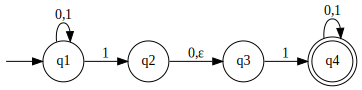

In [20]:
nfaN1 = NFA (["q1","q2","q3","q4"],[0,1],d,"q1",["q4"])
    where
    d("q1",[0]) = ["q1"]
    d("q1",[1]) = ["q1","q2"]
    d("q2",[0]) = ["q3"]
    d("q2",[] ) = ["q3"] -- epsilon move
    d("q3",[1]) = ["q4"]
    d("q4",[0]) = ["q4"]
    d("q4",[1]) = ["q4"]
    d( _  , _ ) = []

nfaN1

drawNFA nfaN1

In [21]:
import Data.List (union, intersect, sort)

eclosure :: Ord q => ( (q,[a]) -> [q] ) -> [q] -> [q]
eclosure d rs
    | length rs == length rs' = rs'
    | otherwise               = eclosure d rs'
    where
    rs' = sort $ foldr union rs [d(r,[]) | r<-rs]

$M=(Q,\Sigma,\delta,q_0,F)$ accepts $w = a_1a_2a_3\cdots a_n$ where $a_i\in\Sigma$
<br>
if
$\delta_\varepsilon(\cdots\delta_\varepsilon(\delta_\varepsilon(\delta_\varepsilon(\{q_0\},a_1),a_2),a_3)\cdots,a_n) \cap F \neq \emptyset$
<br>
where
<br>
$\delta_\varepsilon : \mathcal{P}(Q) \times \Sigma \to \mathcal{P}(Q)$<br>
$\displaystyle\delta_\varepsilon(R,a) =  \mathcal{E}\left( \bigcup_{r\,\in\,\mathcal{E}(R)} \delta(r,a) \right)$

$\mathcal{E} : \mathcal{P}(Q) \to \mathcal{P}(Q)$<br>
$\mathcal{E}(R) = \big\{ q \mid r \in R,~r \stackrel{\varepsilon~}{\longrightarrow^*}q \big\}$

한 번의 NFA 상태전이 $q\in\delta(r,x)$를 $r \stackrel{x}{\longrightarrow}q$로 나타낸다.<br>
$r$로부터 0회 이상 여러 번 반복해서 연달아 같은 $x$ 라벨의 상태전이를 한 후에 $q$에 도달하면 $r \stackrel{x~}{\longrightarrow^*}q$로 나타낸다.

In [22]:
accepts_ :: Ord q => NFA q a -> [a] -> Bool
(NFA (_,as,d,q0,fs)) `accepts_` w = not . null $ foldl (curry d') [q0] w `intersect` fs
    where
    eclos = eclosure d
    d'(rs,a) = eclos $ foldr union [] [d(r,[a]) | r<-eclos rs]

In [23]:
-- Figure 1.29
nfaN1 `accepts_` [0,1,0,1,1,0]

True

In [24]:
nfaN1 `accepts_` [1,0,1]
nfaN1 `accepts_` [1,1]

True

True

In [25]:
nfaN1 `accepts_` [1,0,0]
nfaN1 `accepts_` [0,1,0]

False

False

In [26]:
-- nfaN2

In [27]:
-- nfaN3

### Equivalenceof NFAs and DFAs

DFA와 같은 일을 하는 NFA가 있음을 보이는 것은 간단하다

In [28]:
dfa2nfa :: DFA q a -> NFA q a
dfa2nfa (DFA (qs,as,d,q0,fs)) = NFA (qs,as,d',q0,fs)
    where
    d'(_,[] ) = [] -- no epslion moves
    d'(r,[a]) = [d(r,a)]

Theorem 1.39 모든 NFA는 그와 같은 일을 하는 DFA가 있다

In [29]:
nfa2dfa (NFA (qs,as,d,q0,fs)) = DFA (qs',as,d',q0',fs')
    where
    qs' = powerset qs
    fs' = [rs | rs<-qs', not . null $ rs `intersect` fs]
    eclos = eclosure d
    q0' = eclos [q0]
    d'(rs,a) = sort $ foldr union [] [eclos(d(r,[a])) | r<-rs]

powerset :: [a] ->  [[a]]
powerset []     = [[]]
powerset (x:xs) = powerset xs ++ map (x:) (powerset xs)

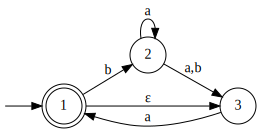

In [30]:
nfaN4 = NFA ([1,2,3],["a","b"],d,1,[1])
    where
    d(1,["b"]) = [2]
    d(1,[]   ) = [3]
    d(2,["a"]) = [2,3]
    d(2,["b"]) = [3]
    d(3,["a"]) = [1]
    d(_,_    ) = []

drawNFA nfaN4

([[],[3],[2],[2,3],[1],[1,3],[1,2],[1,2,3]],["a","b"],[(([],"a"),[]),(([],"b"),[]),(([3],"a"),[1,3]),(([3],"b"),[]),(([2],"a"),[2,3]),(([2],"b"),[3]),(([2,3],"a"),[1,2,3]),(([2,3],"b"),[3]),(([1],"a"),[]),(([1],"b"),[2]),(([1,3],"a"),[1,3]),(([1,3],"b"),[2]),(([1,2],"a"),[2,3]),(([1,2],"b"),[2,3]),(([1,2,3],"a"),[1,2,3]),(([1,2,3],"b"),[2,3])],[1,3],[[1],[1,3],[1,2],[1,2,3]])

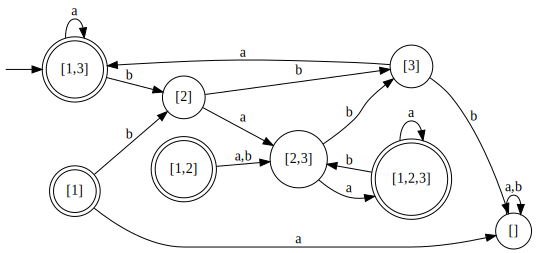

In [31]:
dfaN4 = nfa2dfa nfaN4

dfaN4

drawDFA dfaN4

In [32]:
trimUnreachableDFA (DFA (qs,as,d,q0,fs)) = DFA (qs',as,d,q0,fs')
    where
    qs' = reachable as d [q0]
    fs' = fs `intersect` qs'

reachable as d rs
    | length rs == length rs' = rs'
    | otherwise               = reachable as d rs'
    where rs' = sort $ rs `union` [d(r,a) | r<-rs, a<-as]

([[],[1,2,3],[1,3],[2],[2,3],[3]],["a","b"],[(([],"a"),[]),(([],"b"),[]),(([1,2,3],"a"),[1,2,3]),(([1,2,3],"b"),[2,3]),(([1,3],"a"),[1,3]),(([1,3],"b"),[2]),(([2],"a"),[2,3]),(([2],"b"),[3]),(([2,3],"a"),[1,2,3]),(([2,3],"b"),[3]),(([3],"a"),[1,3]),(([3],"b"),[])],[1,3],[[1,3],[1,2,3]])

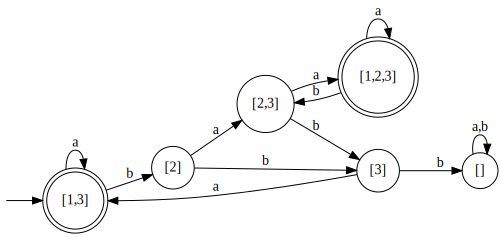

In [33]:
dfaN4' = trimUnreachableDFA dfaN4

dfaN4'

drawDFA dfaN4'

### Closure under the regular operations

union 연산의 닫힘을 DFA를 이용해 보였던 것처럼
concat, star 연산의 닫힘을 NFA를 이용해 보일 수 있음

----
## 1.3 Regular Expression

### Formal definition of a regular expression

* Definition 1.52

  다음과 같은 방법으로 구성되는 $R$을 정규식이라 또는 정규표현식이라 한다. 오른쪽에는 정규식이 나타내는 언어를 설명하였다.
  
  1. $a\in \Sigma\qquad$ $\{a\}$를 나타냄
  1. $\varepsilon\quad\qquad$ $\{\varepsilon\}$을 나타냄
  1. $\emptyset\quad\qquad$ 공집합을 나타냄
  1. $R_1 | R_2\quad$ 정규식 $R_1$과 $R_2$가 나타내는 언어의 합집합(union)을 나타냄
  1. $R_1 R_2\quad$ 정규식 $R_1$과 $R_2$가 나타내는 언어의 이어붙임(concat)을 나타냄
  1. $R_1^*\qquad$ 정규식 $R_1$나 나타내는 언어의 0회 이상 반복(star)를 나타냄
  
정규식 표기는 $\Sigma\cup\{\varepsilon, \emptyset, |, *\}$를 알파벳으로 하나는 언어로 볼 수 있으며
정규식의 언어를 $\mathcal{R}$이라 표기한다.

그러니까 $R\in\mathcal{R}$

In [76]:
data RE a = Symbol a
          | Epsilon 
          | Empty
          | Union (RE a) (RE a)
          | Concat (RE a) (RE a)
          | Star (RE a)
          deriving Eq

instance Show a => Show (RE a) where
  show (Symbol a) = show a
  show Epsilon = "ε"
  show Empty = "∅"
  show (Union r1 r2) = show r1++"|"++show r2
  show (Concat r1 r2) = showU r1 ++ showU r2
  show (Star r) = showUC r++"*"

showU r@(Union _ _) = "("++show r++")"
showU r             = show r

showUC r@(Concat _ _) = "("++show r++")"
showUC r              = showU r

In [77]:
Epsilon
Empty
Symbol 0
Symbol 0 `Union` Concat (Symbol 1) (Star (Symbol 0))
Star(Symbol 0 `Union` Concat (Symbol 1) (Star (Symbol 0)))

ε

∅

0

0|10*

(0|10*)*

### Equivalence with finite automata

정규식에 해당하는 NFA를 찾는 것은 정규연산의 닫힘에 대한 내용을 따라 진행하면 된다.

반대로 DFA에 해당하는 정규식을 찾는 것은 NFA를 일반화하여 정규식으로 라벨된 GNFA라는 것을 이용한다.

* Definition 1.64 GNFA

  $M=(Q,\Sigma,\delta,q_\mathrm{start},q_\mathrm{final})$
    1. $Q$ 상태의 유한집합
    1. $\Sigma$ 알파벳 - 심볼의 유한집합
    1. $\delta : (Q-\{q_\mathrm{final}\}) \times (Q-\{q_\mathrm{start}\}) \to \mathcal{R}$ 전이함수       
    1. $q_\mathrm{start}$ 시작상태
    1. $q_\mathrm{final}$ 종료상태
 
NFA와 달리 GNFA의 종료상태는 항상 1개로 정해져 있다.

또한 전이함수의 타입에서 알 수 있듯,
 * 시작과 종료상태를 제외한 모든 상태에서 자기 자신을 포함한 모든 상태로 전이하는 화살표가 있다.
 * 그리고 시작 상태에서는 들어오는 화살표는 없지만 다른 모든 상태로 나가는 화살표가 있으며,
 * 반대로 종료 상태에서는 나가는 화살표는 없지만 다른 모든 상태에서 들어오는 화살표가 있다.

In [78]:
newtype GNFA q a = GNFA ([q], [a], (q,q) -> RE a, q, q)

instance (Show q, Show a) => Show (GNFA q a) where
  show (GNFA (qs,as,d,q0,qf)) = show (qs,as,dtbl,q0,qf)
      where dtbl = d2tblGNFA qs d

-- 전이함수를 순서쌍 데이타로
d2tblGNFA qs d = [((q1,q2), d(q1,q2)) | q1<-qs, q2<-qs]

In [129]:
import Data.Maybe (fromJust, fromMaybe)
import Data.List (elemIndex, groupBy, intercalate)

import IHaskell.Display.Graphviz
-- dot "digraph { l -> o; o -> v; v -> e; h -> a ; a -> s; s -> k ; k -> e ; e -> l ; l -> l}"

gnfa2graph :: (Eq q, Eq a, Show q, Show a) => GNFA q a -> String
gnfa2graph (GNFA (qs,as,d,q0,qf))
     = "digraph { node [shape=circle]; rankdir=LR; "
    ++ "thestart [shape=none label=\"\" width=0]; "
    ++ "thestart -> "++show(q2i q0)++"; "
    ++ concat [show i++" [label=\""++(filter (/='"') . show $ i2q i)++"\"]; " | i<-is]
    ++ show(q2i qf)++" [shape=doublecircle]; "
    ++ concat [ show i++" -> "++show j++" [label=\""++filter (/='"') (show r)++"\"]; " | ((i,j),r) <-es]
    ++ "}"
    where
    is = [0 .. length qs-1]
    q2i q = fromJust $ elemIndex q qs
    i2q i = qs !! i
    es = [((i,j), r) | i<-is, i /= q2i qf, j<-is, j /= q2i q0,
              let r = d(i2q i,i2q j), r/=Empty]

drawGNFA :: (Eq q, Eq a, Show q, Show a) => GNFA q a -> Graphviz
drawGNFA = dot . gnfa2graph

In [130]:
import Data.List ( (\\) )

rip q (GNFA (qs,as,d,q0,qf))
    | q == q0 = error "cannot rip start state"
    | q == qf = error "cannot rip final state"
    | q `elem` qs = GNFA (qs',as,d',q0,qf)
    | otherwise = error "invalid state"
    where
    qs' = qs \\ [q]
    d'(qi,qj)
        | q==qi || q==qj = error "ripped state"
        | otherwise = Concat r1 (Concat (Star r2) r3) `Union` r4
        where
        r1 = d(qi,q )
        r2 = d(q ,q )
        r3 = d(q ,qj)
        r4 = d(qi,qj)

In [151]:
-- q0,qf는 qs에 없는 새로운 상태
dfa2gnfa :: (Eq q, Eq a, Show q, Show a) => DFA q a -> q -> q -> GNFA q a
dfa2gnfa (DFA (qs,as,d,p0,fs)) q0 qf = GNFA (q0:qf:qs,as,d',q0,qf)
    where
    qqs = [(q1,q2) | q1<-qs, q2<-qs]
    es = d2tblDFA qs as d
    es' = [ ((q1,q2),as) | q1<-qs, q2<-qs,
                 let as = [a | ((q1',a),q2')<-es, q1==q1', q2==q2'], not (null as) ]
    d'(q1,q2) | q1 == q0 = if q2 == p0     then Epsilon else Empty
    d'(q1,q2) | q2 == qf = if q1 `elem` fs then Epsilon else Empty
    d'(q1,q2) = maybe Empty (foldr1 Union . map Symbol) $ lookup (q1,q2) es'

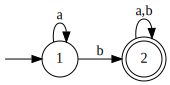

In [152]:
dfa67a = DFA ([1,2],["a","b"],d,1,[2])
    where
    d(1,"a") = 1; d(1,"b") = 2
    d(2,"a") = 2; d(2,"b") = 2

drawDFA dfa67a

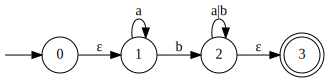

In [154]:
gnfa67b = dfa2gnfa dfa67a 0 3

drawGNFA gnfa67b

----
## 1.4 Nonregular Languages

### The pumping lemma for regular languages

In [139]:
:type maybe

maybe :: forall b a. b -> (a -> b) -> Maybe a -> b